# MNIST 손글씨 - CNN v3
- 2 x Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.25) layer
- 1 Outputlayer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 이미지 정규화와 차원 변경
- 2차원 => 3차원

In [3]:
# 정규화    # 이미지 차원 변경  : 2차원 -> 1차원
X_train = X_train.reshape(-1, 28, 28) / 255.
X_test = X_test.reshape(-1, 28, 28) / 255.
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## 원핫인코딩

In [4]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

# 어떻게 생긴건지 궁금하다...

((60000, 10), (10000, 10))

## 모델 정의 및 설정
- (28, 28, 1) 이지만, 2차원에 컬러일 뿐
- 동영상같은 것이 3차원임
- 차원 축소를 위한 Flatten

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'),     # (26, 26, 32)  = (계산된 N , 축소된 N , 필터의 수)
    Conv2D(64, (3,3), activation='relu'),   # (24, 24, 64)
    MaxPooling2D(),                         # MaxPooling2D(poolsize = (2, 2))
    Dropout(0.25),
    Flatten(),                              # Dense를 위한 Flatten
    Dense(512, activation = 'relu'),
    Dropout(0.25),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [7]:
model.compile('adam', 'categorical_crossentropy',['accuracy'])

In [8]:
model_path = 'best-mnist-cnn-v3.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose = 1)
es = EarlyStopping(patience = 10)

## 모델 학습 및 평가

In [9]:
hist = model.fit(X_train, Y_train, validation_split= 0.2,
                 epochs = 100, batch_size = 200,
                 callbacks = [mc, es])

Epoch 1/100
238/240 [============================>.] - ETA: 0s - loss: 0.1970 - accuracy: 0.9393
Epoch 1: val_loss improved from inf to 0.05439, saving model to best-mnist-cnn-v3.h5
240/240 [==============================] - 15s 15ms/step - loss: 0.1960 - accuracy: 0.9397 - val_loss: 0.0544 - val_accuracy: 0.9846
Epoch 2/100
239/240 [============================>.] - ETA: 0s - loss: 0.0509 - accuracy: 0.9844
Epoch 2: val_loss improved from 0.05439 to 0.04916, saving model to best-mnist-cnn-v3.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0492 - val_accuracy: 0.9872
Epoch 3/100
239/240 [============================>.] - ETA: 0s - loss: 0.0337 - accuracy: 0.9891
Epoch 3: val_loss improved from 0.04916 to 0.03827, saving model to best-mnist-cnn-v3.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 4/100
239/240 [============================

In [10]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9911


[0.027579141780734062, 0.991100013256073]

## 학습과정 시각화

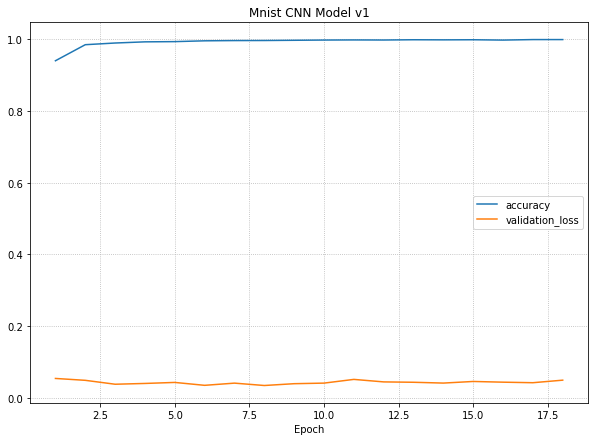

In [11]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

plt.figure(figsize = (10, 7))
plt.plot(xs, y_acc, label = 'accuracy')
plt.plot(xs, y_vloss, label = 'validation_loss')
plt.xlabel('Epoch')
plt.title('Mnist CNN Model v1')
plt.legend()
plt.grid(linestyle = ':')

plt.show()